<a href="https://colab.research.google.com/github/BlazeStorm001/mlp-db/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Discrimination Using SoftMax

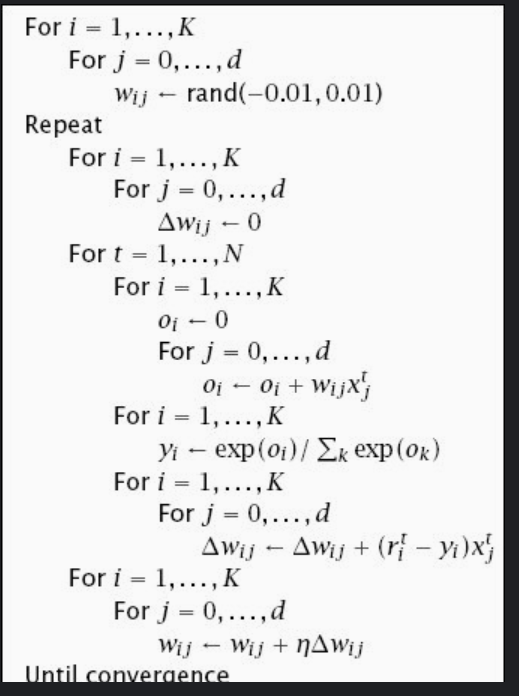

## Import Iris and Apply PCA To reduce to 2 Features

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset using Seaborn
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


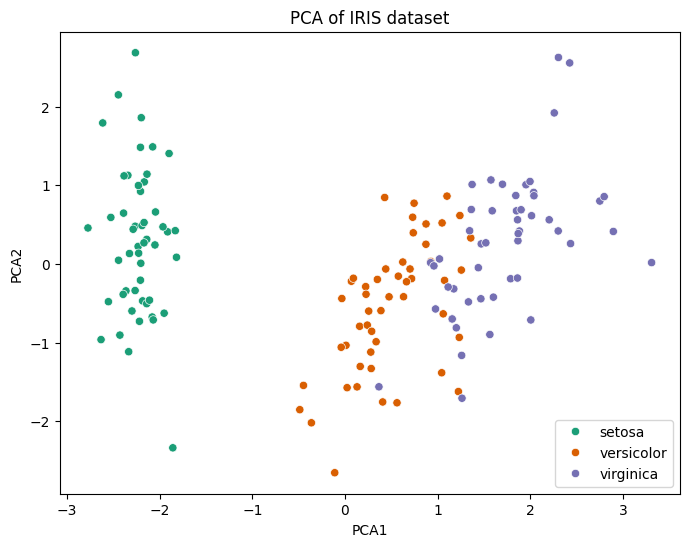

In [ ]:
# Sample categorical data
y = iris['species'].values

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
y_encoded = label_encoder.fit_transform(y)

# Standardize the features (recommended for PCA)
X = iris[['sepal_length','sepal_width','petal_length','petal_width']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data after PCA using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y= X_pca[:,1] ,hue=iris["species"], palette="Dark2")
plt.title("PCA of IRIS dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()


In [ ]:
from sklearn.model_selection import train_test_split

# Assume X is your features and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.25, random_state=42)

In [ ]:
NUM_CLASSES = len(np.unique(y_encoded))
NUM_FEATURES = len(X_train[0])
print(NUM_CLASSES)
print(NUM_FEATURES)

3
2


In [ ]:
pca_df = pd.DataFrame(X_pca)
pca_df['species'] = y_encoded
pca_df

,0,1,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [ ]:
Y = list()
for k in range(NUM_CLASSES):
  y_k = np.where(y_encoded == k, 1, 0).tolist()
  Y.append(y_k)

# print(Y)

##Initialize Random Weights

In [ ]:
# Define the lower and upper bounds for random values
lower_bound = 0
upper_bound = 0
# Create a 3x3 weight matrix with random values in the specified range
W = (upper_bound - lower_bound) * np.random.random((NUM_CLASSES, NUM_FEATURES + 1)) + lower_bound

# Print the random matrix
print(W)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Function For Softmax

In [ ]:
import math
def softmax(W, x, i):
  sum = 0

  o_i = np.exp(np.dot(W[i],x))

  for j in range(len(W)):
    o_j = np.dot(W[j],x)
    sum += np.exp(o_j)

  return o_i/sum;



## Function for Sigmoid

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

## Function for Prediction Without Hidden Layer

In [ ]:
def predict_without_hidden_layer(x_in, W):
  x = np.insert(x_in ,0,1)
  pred = np.zeros((NUM_CLASSES,))

  maxClass = 0
  for k in range(len(W)):
    pred[k] = softmax(W,x,k)
    if(pred[k] > pred[maxClass]):
      maxClass = k

  return maxClass


##Perform Gradient Descent Without Hidden Layer

In [ ]:
LEARNING_RATE = 0.4
ITERATIONS = 1000


def gd_without_hidden_layer(X,y,iterations, init_weights, learning_rate):
  print("Initial Weights: ")
  print(init_weights)
  all_preds = []
  all_W = []
  w = init_weights.copy()
  num_classes = len(np.unique(y))
  num_features = len(X[0])
  for e in range(iterations):
    dJ_dw = np.zeros((num_classes,num_features + 1))
    all_W.append(w.copy())
    preds = []
    num_instances = len(X)
    for i in range(num_instances):

      x = np.insert(X[i],0,1)
      pred = np.zeros((num_classes,))

      maxClass = 0
      for k in range(num_classes):
        pred[k] = softmax(w,x,k)
        if(pred[k] > pred[maxClass]):
          maxClass = k

      preds.append(maxClass)


      r = np.zeros((num_classes,))
      r[y[i]] = 1

      for k in range(num_classes):
        dJ_dw[k] += (pred[k] - r[k])*x



    for k in range(num_classes):
      w[k] = w[k] - (learning_rate/num_instances)*dJ_dw[k]

    all_preds.append(preds)
  return all_W, all_preds

all_W, all_preds = gd_without_hidden_layer(X_train,y_train, ITERATIONS, W,LEARNING_RATE)

Initial Weights: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
all_W[:10]

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[-0.00833333, -0.28291623,  0.04114057],
        [ 0.00595238,  0.06005909, -0.08008301],
        [ 0.00238095,  0.22285713,  0.03894245]]),
 array([[-0.01948819, -0.4631853 ,  0.07587267],
        [ 0.01700332,  0.096838  , -0.14781367],
        [ 0.00248487,  0.3663473 ,  0.07194099]]),
 array([[-3.41708594e-02, -5.88893281e-01,  1.04617650e-01],
        [ 3.46409329e-02,  1.20967144e-01, -2.04546911e-01],
        [-4.70073458e-04,  4.67926137e-01,  9.99292611e-02]]),
 array([[-0.0501576 , -0.68486298,  0.1290676 ],
        [ 0.05607151,  0.13870248, -0.25276288],
        [-0.00591391,  0.54616051,  0.12369528]]),
 array([[-0.06626881, -0.76276774,  0.15029663],
        [ 0.07931685,  0.15273068, -0.29419928],
        [-0.01304804,  0.61003705,  0.14390265]]),
 array([[-0.08197611, -0.82867092,  0.16898127],
        [ 0.10321881,  0.16428983, -0.3300662 ],
        [-0.0212427 ,  0.66438108,  0.16108493]]),
 a

In [ ]:
# all_preds[-1]

## Accuracy Score in Different Iterations

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracies = []
test_accuracies = []
test_preds = []

for i in range(ITERATIONS):
  preds = []
  for j in range(len(X_test)):
    preds.append(predict_without_hidden_layer(X_test[j], all_W[i]))
  test_preds.append(preds)
# Compute accuracy score
  train_accuracies.append(accuracy_score(y_train, all_preds[i]))
  test_accuracies.append(accuracy_score(y_test, preds))
# Print the accuracy score
print("Train Accuracy:", train_accuracies)
print("Test Accuracy:", test_accuracies)

Train Accuracy: [0.3125, 0.8125, 0.8214285714285714, 0.8214285714285714, 0.8303571428571429, 0.8303571428571429, 0.8303571428571429, 0.8303571428571429, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8482142857142857, 0.8482142857142857, 0.8303571428571429, 0.8303571428571429, 0.8303571428571429, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8482142857142857, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.875, 0.875, 0.8928571428571429, 0.89285714285

## Visualize the decision boundaries in every iteration
The colored areas represent the prediction in that area and the color of the dots represent the actual class.
Lines represent the point where the value of discriminant function of the respective class is zero. e.g
$$g_{i}(x) = W_{i}^{T} \cdot x = 0$$

In [ ]:
# e = iteration/epoch
def visualize(e):

  sns.scatterplot(x=X_train[:,0], y= X_train[:,1] ,hue=y_train, palette=['red','green','blue'])
  print(all_W[e])
  x_values = np.linspace(-4, 4, 100)
  y_values = np.linspace(-4, 4 ,100)
  total_x = []
  total_y = []
  max_preds = []

  for x in x_values:
    for y in y_values:
      total_x.append(x)
      total_y.append(y)
      r1 = all_W[e][0][0] + all_W[e][0][1]*x + all_W[e][0][2]*y
      r2 = all_W[e][1][0] + all_W[e][1][1]*x + all_W[e][1][2]*y
      r3 = all_W[e][2][0] + all_W[e][2][1]*x + all_W[e][2][2]*y

      maxi = max(r1,r2,r3)

      if (maxi == r1):
        max_preds.append(0)
      elif(maxi == r2):
        max_preds.append(1)
      else:
        max_preds.append(2)

  print(max_preds)
  y1 = (-all_W[e][0][1] * x_values - all_W[e][0][0]) / all_W[e][0][2]
  y2 = (-all_W[e][1][1] * x_values - all_W[e][1][0]) / all_W[e][1][2]
  y3 = (-all_W[e][2][1] * x_values - all_W[e][2][0]) / all_W[e][2][2]


  plt.xlim(-4, 4)
  plt.ylim(-4, 4)

  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


  plt.plot(x_values,y1,color="red")
  plt.plot(x_values,y2,color="blue")
  plt.plot(x_values,y3,color="green")



[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<ipython-input-144-c89cde28e124>:30: RuntimeWarning: invalid value encountered in divide
  y1 = (-all_W[e][0][1] * x_values - all_W[e][0][0]) / all_W[e][0][2]
<ipython-input-144-c89cde28e124>:31: RuntimeWarning: invalid value encountered in divide
  y2 = (-all_W[e][1][1] * x_values - all_W[e][1][0]) / all_W[e][1][2]
<ipython-input-144-c89cde28e124>:32: RuntimeWarning: invalid value encountered in divide
  y3 = (-all_W[e][2][1] * x_values - all_W[e][2][0]) / all_W[e][2][2]
<ipython-input-144-c89cde28e124>:38: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


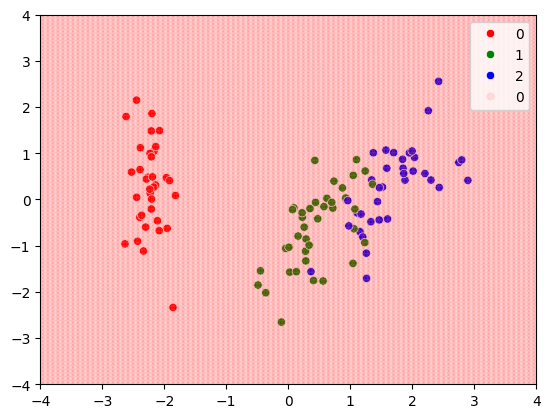

In [ ]:
visualize(0)

[[-0.1380434  -1.02542849  0.22600005]
 [ 0.19599336  0.19570096 -0.43311836]
 [-0.05794996  0.82972753  0.2071183 ]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

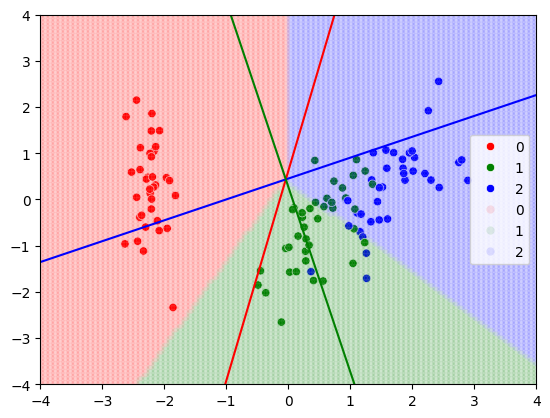

In [ ]:
visualize(10)

[[-0.3953045  -1.84489068  0.39768265]
 [ 0.78505896  0.21255084 -0.52606192]
 [-0.38975446  1.63233984  0.12837927]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

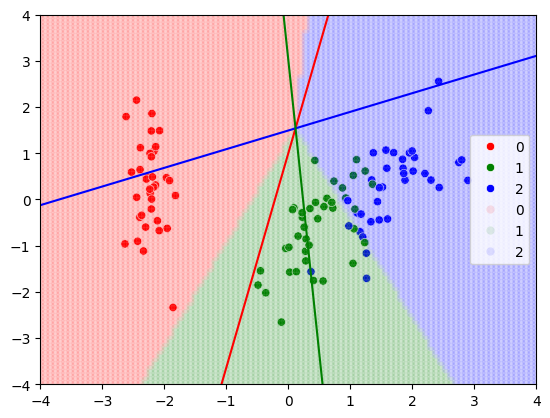

In [ ]:
visualize(50)

[[-0.67933334 -3.98624461  0.68407527]
 [ 2.62416908 -0.15333782 -0.09058078]
 [-1.94483574  4.13958243 -0.59349449]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

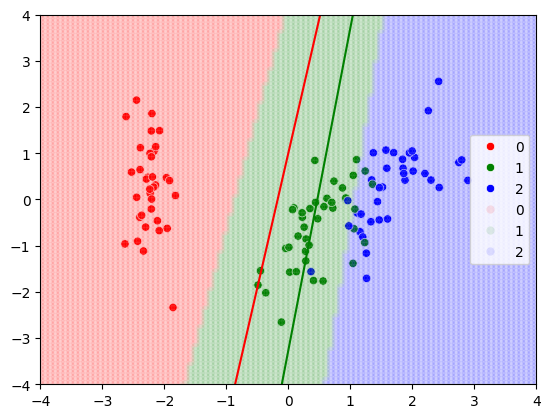

In [ ]:
visualize(500)

[[-0.74483324 -4.73879083  0.80829315]
 [ 3.18007454 -0.22346465 -0.01851586]
 [-2.4352413   4.96225549 -0.78977729]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

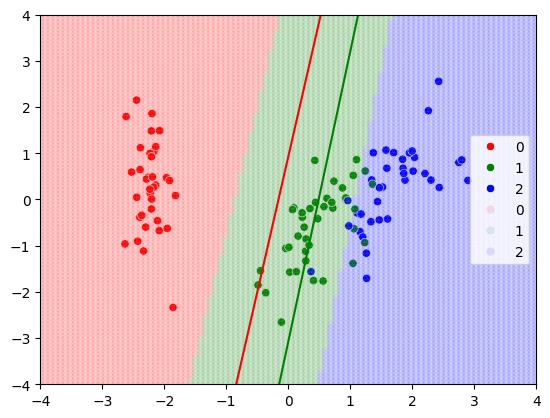

In [ ]:
visualize(999)

# Non-Linear Discrimination Using Hidden Layer Using Sigmoid Activation
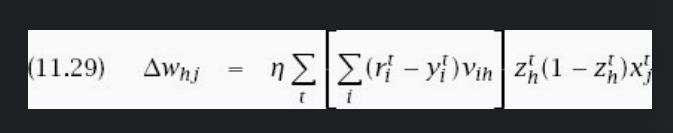

## Initialize Random Weights for Second Matrix, V

In [ ]:
# Define the lower and upper bounds for random values
lower_bound = 0
upper_bound = 0
# Create a 3x3 weight matrix with random values in the specified range
V = (upper_bound - lower_bound) * np.random.random((NUM_CLASSES, NUM_CLASSES + 1)) + lower_bound

# Print the random matrix
print(V)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Function for prediction with hidden layer

In [ ]:
THRESHOLDING = False
def predict_with_hidden_layer(x_in, W, V, thresholding):
  x = np.insert(x_in,0,1)
  z = np.zeros((NUM_CLASSES + 1,))
  z[0] = 1
  for h in range(NUM_CLASSES):
    if (not thresholding):
      z[h + 1] = sigmoid(np.dot(W[h],x))
    else:
      temp = sigmoid(np.dot(W[h],x))
      if(temp >= 0.5):
        z[h + 1] = 1
      else:
        z[h + 1] = 0

  pred = np.zeros((NUM_CLASSES,))

  maxClass = 0
  for k in range(NUM_CLASSES):
   pred[k] = softmax(V,z,k)
   if(pred[k] > pred[maxClass]):
    maxClass = k
  return maxClass

##Gradient Descent With Single Hidden Layer
**The no. of neurons in hidden layer = No. of classes**

In [ ]:
ITERATIONS = 1000
LEARNING_RATE = 0.4

def gd_with_hidden_layer(X,y,iterations, init_weights_W, init_weights_V, learning_rate,thresholding):
  print("Initial Weights: ")
  print("W: ", init_weights_W)
  print("V: ", init_weights_V)

  all_preds = []
  all_V = []
  all_W = []
  all_loss = []
  v = init_weights_V.copy()
  w = init_weights_W.copy()
  num_classes = len(np.unique(y))
  num_features = len(X[0])

  for e in range(iterations):

    dJ_dw = np.zeros((num_classes,num_features + 1))
    dJ_dv = np.zeros((num_classes,num_classes + 1))
    print(f"w at iter = {e + 1} is :", w)
    print(f"v at iter = {e + 1} is :", v)
    all_W.append(w.copy())
    all_V.append(v.copy())
    preds = []
    num_instances = len(X)
    loss = 0
    for i in range(num_instances):

      x = np.insert(X[i],0,1)
      z = np.zeros((num_classes + 1,))
      z[0] = 1
      for h in range(num_classes):
        if (not thresholding):
          z[h + 1]  = sigmoid(np.dot(w[h],x))
        else:
          temp = sigmoid(np.dot(w[h],x))
          if(temp >= 0.5):
            z[h + 1] = 1
          else:
            z[h + 1] = 0
      # print("z :", z)
      pred = np.zeros((num_classes,))

      maxClass = 0
      for k in range(num_classes):
        pred[k] = softmax(v,z,k)
        if(pred[k] > pred[maxClass]):
          maxClass = k
      # print("Pred: ", pred)
      preds.append(maxClass)


      r = np.zeros((num_classes,))
      r[y[i]] = 1

      for k in range(num_classes):
        loss += -r[k]*np.log(pred[k])

      for k in range(num_classes):
        dJ_dv[k] += (pred[k] - r[k])*z

      for h in range(num_classes):
        tempSum = 0
        for c in range(num_classes):
            tempSum += (r[c] - pred[c])*v[c][h]
        # print("tempsum = ", tempSum)
        # print("z[h]*(z[h] - 1) = ", z[h]*(z[h] - 1))
        for j in range(num_features + 1):
          dJ_dw[h][j] += tempSum*z[h]*(z[h] - 1)*x[j]

    # print("dW: ",dJ_dw)
    # print("dV: ",dJ_dv)



    for k in range(num_classes):
      w[k] = w[k] - (learning_rate/num_instances)*dJ_dw[k]
      v[k] = v[k] - (learning_rate/num_instances)*dJ_dv[k]

    all_preds.append(preds)
    all_loss.append(loss)
  return all_W, all_V, all_preds, all_loss

all_W_nn, all_V_nn, all_preds_nn, all_loss_nn = gd_with_hidden_layer(X_train,y_train, ITERATIONS, W,V,LEARNING_RATE, THRESHOLDING)

Streaming output truncated to the last 5000 lines.
 [ 0.2905343   0.14526715 -0.04972349 -0.61705397]
 [ 0.60338258  0.30169129 -0.44791198 -1.33764196]]
w at iter = 168 is : [[ 0.          0.          0.        ]
 [ 0.07686515  0.68608834 -0.10810748]
 [-0.41026595 -4.56348403  0.23255146]]
v at iter = 168 is : [[-0.89984418 -0.44992209  0.47458067  1.98873798]
 [ 0.2950207   0.14751035 -0.04511663 -0.62750842]
 [ 0.60482348  0.30241174 -0.42946404 -1.36122956]]
w at iter = 169 is : [[ 0.          0.          0.        ]
 [ 0.07776461  0.71067716 -0.11115876]
 [-0.41130253 -4.58172403  0.23263501]]
v at iter = 169 is : [[-0.9055597  -0.45277985  0.45150005  2.0220811 ]
 [ 0.2995535   0.14977675 -0.04056602 -0.63767111]
 [ 0.6060062   0.3030031  -0.41093403 -1.38440999]]
w at iter = 170 is : [[ 0.          0.          0.        ]
 [ 0.07863126  0.73489635 -0.11422964]
 [-0.41221414 -4.59826234  0.23264231]]
v at iter = 170 is : [[-0.91107487 -0.45553743  0.42842927  2.05472787]
 [ 0.30

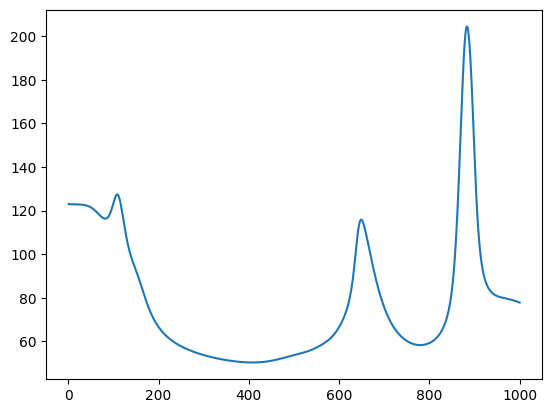

In [ ]:
plt.plot(range(1,1 + ITERATIONS), all_loss_nn)

In [ ]:
all_W_nn[:10]

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.06029534e-05,  4.05622032e-04, -9.07204500e-05],
        [ 1.06029534e-05,  4.05622032e-04, -9.07204500e-05]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.50040934e-05,  1.12250765e-03, -2.50824568e-04],
        [ 2.50041316e-05,  1.12250752e-03, -2.50824546e-04]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.97691974e-05,  2.07883951e-03, -4.64034589e-04],
        [ 3.98089216e-05,  2.08226028e-03, -4.64283969e-04]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.32847242e-05,  3.21949612e-03, -7.17900018e-04],
        [ 5.34398304e-05,  3.23580056e-03, -7.19086826e-04]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.49015010e-05,  4.50180620e-03, -1.00287239e-03],
  

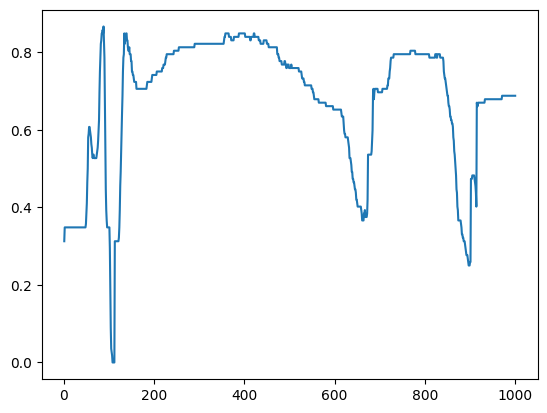

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracies_nn = []
test_accuracies_nn = []
test_preds_nn = []

for i in range(ITERATIONS):
  preds = []
  for j in range(len(X_test)):
    preds.append(predict_with_hidden_layer(X_test[j], all_W_nn[i], all_V_nn[i], THRESHOLDING))
  test_preds_nn.append(preds)
# Compute accuracy score
  train_accuracies_nn.append(accuracy_score(y_train, all_preds_nn[i]))
  test_accuracies_nn.append(accuracy_score(y_test, preds))
# Print the accuracy score
# print("Train Accuracy:", np.round(train_accuracies_nn, 2))
# print("Test Accuracy:", np.round(test_accuracies_nn, 2))
plt.plot(range(1, 1+ITERATIONS), train_accuracies_nn)


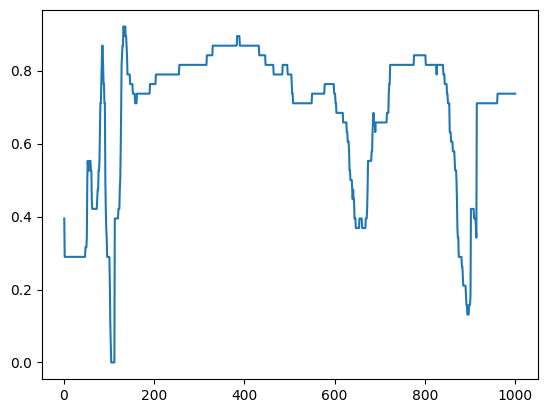

In [ ]:
plt.plot(range(1, 1+ITERATIONS), test_accuracies_nn)

In [ ]:
maxTestAccIndex = np.argmax(test_accuracies_nn)
maxTrainAccIndex = np.argmax(train_accuracies_nn)
print("Best Train Accuracy:", train_accuracies_nn[maxTrainAccIndex])
print("Best Test Accuracy:", test_accuracies_nn[maxTestAccIndex])

Best Train Accuracy: 0.8660714285714286
Best Test Accuracy: 0.9210526315789473


In [ ]:
# e = iteration/epoch
def visualize_nn(e,all_W, all_V):
  # plt.figure(figsize = (10,100))
  sns.scatterplot(x=X_train[:,0], y= X_train[:,1] ,hue=y_train, palette=['red','green','blue'])
  print(all_W[e])
  print(all_V[e])
  x_values = np.linspace(-4, 4, 100)
  y_values = np.linspace(-4, 4 ,100)
  total_x = []
  total_y = []
  max_preds = []

  for x in x_values:
    for y in y_values:
      total_x.append(x)
      total_y.append(y)
      instance = [x, y]
      pred = predict_with_hidden_layer(instance, all_W[e], all_V[e], THRESHOLDING)
      max_preds.append(pred)

  print(max_preds)


  plt.xlim(-4, 4)
  plt.ylim(-4, 4)

  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


[[ 0.          0.          0.        ]
 [ 0.00405055 -0.24528233 -0.00469778]
 [-0.00261579  0.16542057 -0.04326663]]
[[ 0.19763666  0.09881833  0.195522   -0.82809651]
 [-0.03577154 -0.01788577 -0.02441102  0.21259007]
 [-0.16186511 -0.08093256 -0.17111098  0.61550644]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

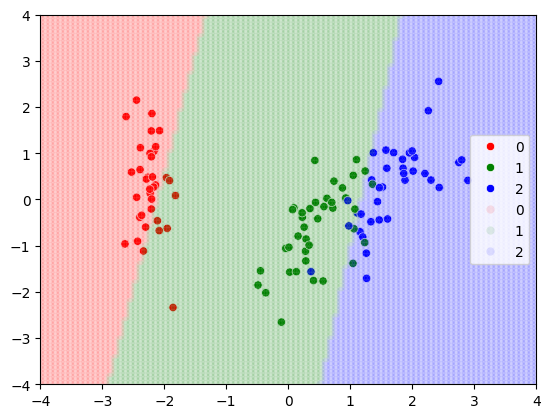

In [ ]:
#visualization for
visualize_nn(maxTrainAccIndex,all_W_nn, all_V_nn)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-158-416a4ba13f23>:27: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


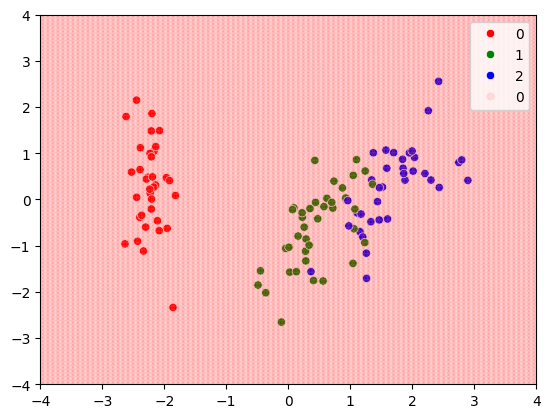

In [ ]:
visualize_nn(0,all_W_nn, all_V_nn)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.20476848e-05  1.04762337e-02 -2.32976930e-03]
 [ 9.39651507e-05  1.10279726e-02 -2.36973090e-03]]
[[-0.03305853 -0.01652926 -0.018972   -0.01902305]
 [ 0.0236205   0.01181025  0.01246068  0.01247242]
 [ 0.00943803  0.00471902  0.00651132  0.00655063]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

<ipython-input-158-416a4ba13f23>:27: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


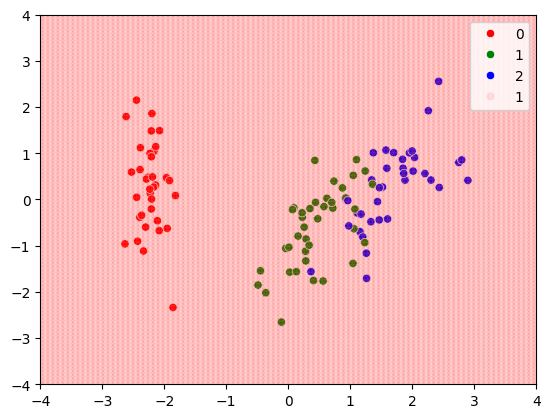

In [ ]:
visualize_nn(10,all_W_nn, all_V_nn)

[[ 0.          0.          0.        ]
 [ 0.00284309 -0.37716073  0.00188798]
 [-0.01278755 -0.2031496  -0.02624019]]
[[ 0.16780044  0.08390022  0.42357894 -0.86102837]
 [-0.03280571 -0.01640285 -0.07463972  0.22564031]
 [-0.13499473 -0.06749736 -0.34893923  0.63538805]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

<ipython-input-158-416a4ba13f23>:27: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=total_x, y=total_y, hue= max_preds, palette=['red','green','blue'], alpha = 0.1)


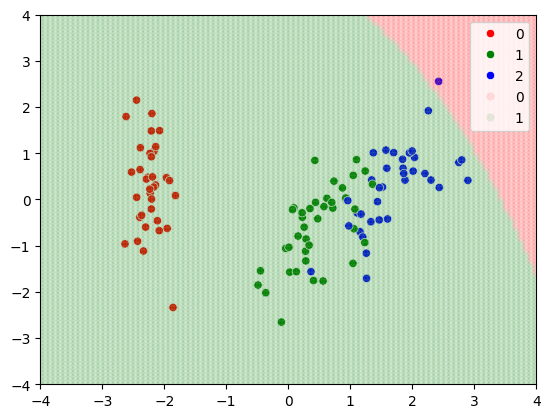

In [ ]:
visualize_nn(99,all_W_nn, all_V_nn)

[[ 0.          0.          0.        ]
 [ 0.07892373  1.4396904  -2.12217731]
 [-1.04897903 -3.51541938  1.26584101]]
[[-0.79710817 -0.39855408 -2.14630991  4.80249051]
 [ 0.81515292  0.40757646  0.40387188 -0.9737781 ]
 [-0.01804475 -0.00902238  1.74243803 -3.82871241]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

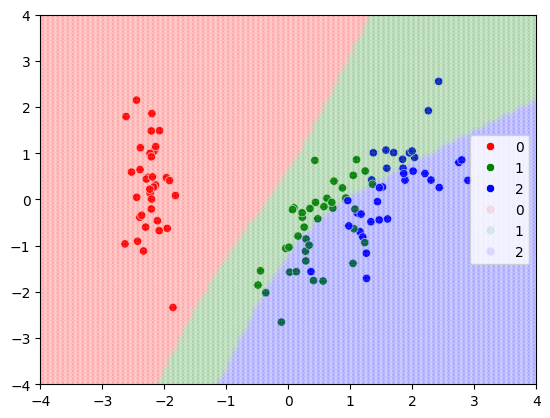

In [ ]:
visualize_nn(500,all_W_nn, all_V_nn)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# # Sample data (replace with your actual X_train and y_train)
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).long()  # Binary targets

# Define the two-hidden-layer neural network
class ZeroInitNet(nn.Module):
    def __init__(self, input_size, hidden_size1, output_size):
        super(ZeroInitNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        # self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size1, output_size)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights and biases to zero
        self.fc1.weight.data.fill_(0)
        self.fc1.bias.data.fill_(0)
        # self.fc2.weight.data.fill_(0)
        # self.fc2.bias.data.fill_(0)
        self.fc3.weight.data.fill_(0)
        self.fc3.bias.data.fill_(0)

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        # x = self.sigmoid(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Model initialization
input_size = X_train.shape[1]
hidden_size1 = 3
# hidden_size2 = 4
output_size = 3

model = ZeroInitNet(input_size, hidden_size1, output_size)

print(model.state_dict())

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=2)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Print the final weights for analysis
print("Final weights of fc1:", model.fc1.weight)
# print("Final weights of fc2:", model.fc2.weight)
print("Final weights of fc3:", model.fc3.weight)


<ipython-input-201-f8ea351d210a>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).float()
<ipython-input-201-f8ea351d210a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).long()  # Binary targets


OrderedDict([('fc1.weight', tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])), ('fc1.bias', tensor([0., 0., 0.])), ('fc3.weight', tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])), ('fc3.bias', tensor([0., 0., 0.]))])
Epoch [1/1000], Loss: 1.0986
Epoch [2/1000], Loss: 1.0984
Epoch [3/1000], Loss: 1.0982
Epoch [4/1000], Loss: 1.0980
Epoch [5/1000], Loss: 1.0979
Epoch [6/1000], Loss: 1.0978
Epoch [7/1000], Loss: 1.0977
Epoch [8/1000], Loss: 1.0976
Epoch [9/1000], Loss: 1.0974
Epoch [10/1000], Loss: 1.0973
Epoch [11/1000], Loss: 1.0972
Epoch [12/1000], Loss: 1.0970
Epoch [13/1000], Loss: 1.0968
Epoch [14/1000], Loss: 1.0965
Epoch [15/1000], Loss: 1.0962
Epoch [16/1000], Loss: 1.0959
Epoch [17/1000], Loss: 1.0954
Epoch [18/1000], Loss: 1.0949
Epoch [19/1000], Loss: 1.0942
Epoch [20/1000], Loss: 1.0934
Epoch [21/1000], Loss: 1.0925
Epoch [22/1000], Loss: 1.0913
Epoch [23/1000], Loss: 1.0899
Epoch [24/1000], Loss: 1.0882
Epoch [25/1000], Loss: 1.0861
Epoch [26/1000], 

In [ ]:
# Assuming X_test and y_test are defined
X_test = torch.tensor(X_test).float()  # Convert test inputs to tensor
y_test = torch.tensor(y_test).long()  # Convert test labels to tensor
predicted = None
# Evaluation function
def evaluate_model(model, X_test, y_test):
    global predicted
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        outputs = model(X_test)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        accuracy = (predicted == y_test).sum().item() / y_test.size(0)  # Compute accuracy
    return accuracy

# Call the evaluation function
test_accuracy = evaluate_model(model, X_test, y_test)

# Print results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 92.11%


<ipython-input-202-d99ce5dec68a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).float()  # Convert test inputs to tensor
<ipython-input-202-d99ce5dec68a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test).long()  # Convert test labels to tensor


In [ ]:
predicted[:10]

tensor([1, 0, 2, 1, 2, 0, 1, 2, 2, 1])

In [ ]:
y_test[:10]

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])